### Regression model V21
Use most recent 20% as test set to test leakage in new feature avg prior late arrival to origin location

try gradient boosted regressor (see cell 14)

In [1]:
fileprefix='./lateness_PREP_V12_'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_X=pd.read_csv(fileprefix+'X.csv', sep='\t')

In [4]:
df_X.shape

(125675, 217)

In [5]:
df_y=pd.read_csv(fileprefix+'y.csv', sep='\t', header=None)

In [6]:
type(df_y)
df_y.shape

(125675, 2)

In [7]:
df_y.head()

,0,1
0,5,-497.0
1,6,5.0
2,7,-313.0
3,8,-296.0
4,9,-166.0


In [8]:
y=df_y[1]
y.head()

0   -497.0
1      5.0
2   -313.0
3   -296.0
4   -166.0
Name: 1, dtype: float64

In [9]:
y.shape

(125675,)

In [10]:
df_X.head()

,Unnamed: 0,claimed_at_pdt_hour_22,claimed_at_pdt_hour_1,scheduled_starts_at_pdt_hour_11,origin_analysis_metro_name_OC,scheduled_starts_at_pdt_quarter,created_at_pdt_weekofyear,origin_region_id,claimed_at_pdt_month_4,origin_region_name_San Fernando Valley - East,...,total_predicted_duration,scheduled_starts_at_pdt_hour_9,claimed_at_pdt_quarter_4,origin_location_id,claimed_at_pdt_hour_3,drivers_prev_ride_1hr_int,driver_home_lon,scheduled_starts_at_pdt_hour,origin_lon,driver_signup_before_org_signup_secs
0,5,0,0,0,0,1,5,44.0,0,1,...,36.47,0,0,82879.0,0,1,-118.25,16,-118.35,-69412.0
1,6,0,0,0,0,1,2,33.0,0,0,...,29.00,0,0,83958.0,0,1,-118.25,16,-118.31,-69815.0
2,7,0,0,0,0,1,5,48.0,0,0,...,18.90,0,0,84580.0,0,1,-118.25,16,-118.16,-66508.0
3,8,0,0,0,0,1,4,36.0,0,0,...,22.93,0,0,87880.0,0,1,-118.25,16,-118.24,-69324.0
4,9,0,0,0,0,1,40,45.0,0,0,...,35.50,0,0,92149.0,0,0,-118.25,14,-118.51,-70895.0


In [11]:
y.describe().round()

count    125675.0
mean       -416.0
std         509.0
min       -1800.0
25%        -657.0
50%        -324.0
75%         -96.0
max        1800.0
Name: 1, dtype: float64

In [12]:
# break df_X,y into test and train sets
###from sklearn.model_selection import train_test_split
###X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.20, random_state=808)
# use first 80% as train and last 30% as test to test for leakage
###print(y.shape[0])
###train_split=0.80
###index = int(np.floor(y.shape[0] * train_split))
###print(index)
###y_train = y[:index]
###print(y_train.shape)
###X_train = df_X[:index]
###print(X_train.shape)
###y_test = y[index:]
###print(y_test.shape)
##print(y_train.head())
##print(y_train.tail())
##print(y_test.head())
##print(y_test.tail())
###X_test = df_X[index:]
###print(X_test.shape)
###X_train.iloc[:10]['scheduled_starts_at_pdt_dayofyear']
## this shows df_X (and y) are not in time sorted order... so try another approach
##X_train.iloc[:10]['scheduled_starts_at_pdt_dayofyear'][X_train['scheduled_starts_at_pdt_dayofyear']<100]
###df_X[df_X.scheduled_starts_at_pdt_dayofyear>=100]['scheduled_starts_at_pdt_dayofyear'].head(10)
###y[df_X.scheduled_starts_at_pdt_dayofyear>=100].head(10)
###y[df_X.scheduled_starts_at_pdt_dayofyear>=299].count()

## to test for leakage train on older data and test on newer data
## approximate 80/20 split
## data contains 1 year of data, first 298 days of the year use for training, rest use for testing
y_train = y[df_X.scheduled_starts_at_pdt_dayofyear<299]
X_train = df_X[df_X.scheduled_starts_at_pdt_dayofyear<299]
y_test = y[df_X.scheduled_starts_at_pdt_dayofyear>=299]
X_test = df_X[df_X.scheduled_starts_at_pdt_dayofyear>=299]


In [13]:
for i in X_train, X_test, y_train, y_test:
    print(i.shape)

(100198, 217)
(25477, 217)
(100198,)
(25477,)


In [14]:
# select a regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(max_depth=4, random_state=808, n_estimators=200)

In [15]:
# fit model
model=model.fit(X_train,y_train)

In [16]:
print(model.feature_importances_)

[2.19953944e-02 0.00000000e+00 0.00000000e+00 3.94284381e-04
 5.54908594e-04 2.84009698e-06 3.12356408e-03 4.11684386e-03
 4.91708730e-04 9.03991793e-04 9.55145057e-05 0.00000000e+00
 0.00000000e+00 7.04178585e-04 0.00000000e+00 0.00000000e+00
 4.83782532e-03 5.03786271e-04 7.51584825e-03 0.00000000e+00
 3.56019985e-02 0.00000000e+00 3.45031643e-02 1.63548871e-03
 1.34016348e-02 3.34985604e-04 1.44103717e-02 8.48903835e-03
 0.00000000e+00 5.41966207e-03 2.25119990e-04 5.28109217e-03
 0.00000000e+00 9.57326554e-05 0.00000000e+00 0.00000000e+00
 8.76566329e-04 0.00000000e+00 4.19090460e-04 1.00410732e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.06804106e-02
 0.00000000e+00 3.20099620e-04 0.00000000e+00 5.98180082e-04
 2.69524837e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.83022082e-02 5.55909497e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.02250721e-03 0.00000000e+00
 1.68564582e-03 4.00750623e-02 8.61643491e-04 0.00000000e+00
 0.00000000e+00 3.514444

In [17]:
importances = list(zip(model.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.15481936552599188, 'avg_prior_arrived_late_seconds'),
 (0.050680410564524124, 'claimed_before_trip_start_secs'),
 (0.04455868174674853, 'driver_id'),
 (0.040075062329817585, 'driver_previous_completed_trips'),
 (0.03560199849685661, 'driver_home_lat'),
 (0.034503164293399016, 'avg_prior_arrived_late_seconds_to_origin_location'),
 (0.03255029289290532, 'driver_home_lon'),
 (0.02800956984054882, 'origin_location_id'),
 (0.024174004025459057, 'scheduled_starts_at_pdt_hour'),
 (0.022540143987402117, 'destination_location_id'),
 (0.021995394389745234, 'Unnamed: 0'),
 (0.020704653159836647, 'driver_created_at_pdt_dayofyear'),
 (0.02070379501657128, 'origin_lon'),
 (0.02061712654765069, 'driver_signup_before_org_signup_secs'),
 (0.018358911314023535, 'driver_signup_before_trip_start_secs'),
 (0.01830220819848268, 'trip_created_before_trip_start_secs'),
 (0.015903696130587917, 'org_signup_before_trip_start_secs'),
 (0.015759077992939276, 'driver_created_at_pdt_day'),
 (0.014410371731709656

In [18]:
# top 10 importances
dict(importances[:10]).values()


dict_values(['avg_prior_arrived_late_seconds', 'claimed_before_trip_start_secs', 'driver_id', 'driver_previous_completed_trips', 'driver_home_lat', 'avg_prior_arrived_late_seconds_to_origin_location', 'driver_home_lon', 'origin_location_id', 'scheduled_starts_at_pdt_hour', 'destination_location_id'])

In [19]:
# number of non-zero features used
len([(i,f) for i, f in importances if i > 0])

145

In [20]:
# number of features with importance above 1%
len([(i,f) for i, f in importances if i > 0.01])

30

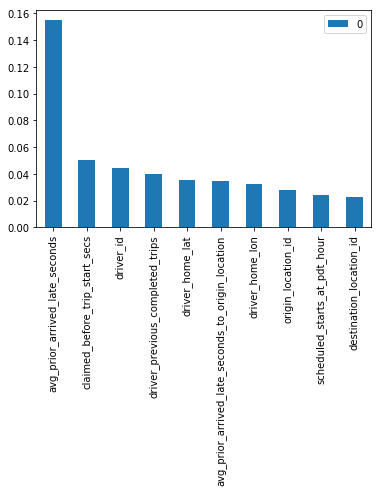

In [36]:
pd.DataFrame(importances[:10], index=[x for (_,x) in importances[:10] ]).plot(kind = 'bar')

In [22]:
# score against TRAINING set
model.score(X_train,y_train)

0.29687833116788354

In [23]:
# score against TEST set
model.score(X_test,y_test)

0.1862349701037577

In [24]:
model_y_test_pred = model.predict(X_test)
model_y_test_pred.size

25477

In [25]:
type(model_y_test_pred)

numpy.ndarray

In [26]:
model_y_test_pred[:10]

array([-257.82682439, -150.38999599,  -14.60516786, -210.90030208,
          6.49445784,  -75.29592491, -332.48179412, -612.09800866,
       -195.06038107, -582.09619909])

In [27]:
pd.Series(model_y_test_pred).std()

247.3287353040212

In [28]:
pd.Series(model_y_test_pred).corr(y_test)

-0.008311844105571028

In [29]:
# regression metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from math import sqrt
print ("%.3f %.2f %.0f %.3f %.0f %.0f %.2f" % 
       (explained_variance_score(y_test, model_y_test_pred),
        sqrt(mean_squared_error(y_test, model_y_test_pred))/60, # sqrt of MSE in minutes
        mean_squared_error(y_test, model_y_test_pred), 
        r2_score(y_test, model_y_test_pred), 
        mean_absolute_error(y_test, model_y_test_pred), 
        median_absolute_error(y_test, model_y_test_pred),
        median_absolute_error(y_test, model_y_test_pred)/60 # MAE in minutes
       ))

0.186 7.54 204536 0.186 334 245 4.09


In [30]:
# make classifications from seconds late target
bins = np.array([0.0, 5*60, 15*60]) # 0 on-time, 1 almost on-time, 2 late, 3 extremely late
bins

array([  0., 300., 900.])

In [31]:
np.digitize(y_test, bins)[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [32]:
# materialize y_test_class array
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
y_test_class=np.digitize(y_test, bins)
unique, counts = np.unique(y_test_class, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 21301]
 [    1  3118]
 [    2   904]
 [    3   154]]


In [33]:
# materialize model_y_pred_class
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
model_y_test_pred_class=np.digitize(model_y_test_pred, bins)
print(np.asarray(np.unique(model_y_test_pred_class, return_counts=True)).T)

[[    0 24719]
 [    1   658]
 [    2    89]
 [    3    11]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class,model_y_test_pred_class))

             precision    recall  f1-score   support

          0       0.84      0.98      0.91     21301
          1       0.28      0.06      0.10      3118
          2       0.24      0.02      0.04       904
          3       0.45      0.03      0.06       154

avg / total       0.75      0.83      0.77     25477



In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_class,model_y_test_pred_class,labels=[0,1,2,3]))

[[20855   414    32     0]
 [ 2913   183    20     2]
 [  824    55    21     4]
 [  127     6    16     5]]
